## Error Analysis and Visualisation for XGBoost Models

### Check running python kernel

In [1]:
!which python

/home/smose_roshni/miniconda3/envs/ml-fuel/bin/python


### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
from sklearn.metrics import r2_score

### Top Level Constants

In [3]:
drop_columns = ['lon', 'lat', 'APE']
HIGH_THRESHOLD = 1e10
result_dir = '../../data/tropics/results'
model_type = 'tropics'

### Inference Files

In [4]:
FILE_PATHS = os.path.join(result_dir, '*'+model_type+'*.csv')
FILE_NAMES = glob.glob(FILE_PATHS)
print(FILE_NAMES)

['../../data/tropics/results/tropics_output_Nov.csv', '../../data/tropics/results/tropics_output_Aug.csv', '../../data/tropics/results/tropics_output_Dec.csv', '../../data/tropics/results/tropics_output_Oct.csv', '../../data/tropics/results/tropics_output_July.csv', '../../data/tropics/results/tropics_output_Sept.csv']


### Make Dataframe

In [5]:
fli_df = pd.concat((pd.read_csv(f, index_col=False).reset_index(drop=True) for f in FILE_NAMES), ignore_index=True)

In [6]:
fli_df

,lat,lon,actual_load,predicted_load,APE
0,-29.875,-63.125,4.211049e+08,2.827371e+08,32.858264
1,-29.875,-62.625,4.271821e+07,2.718299e+08,536.332655
2,-29.375,152.625,6.195756e+08,9.301195e+08,50.122035
3,-29.375,152.875,2.379785e+09,9.367562e+08,60.636946
4,-29.125,-58.875,4.043890e+07,2.941714e+08,627.446513
...,...,...,...,...,...
28493,8.125,81.125,1.046162e+09,7.035975e+08,32.744871
28494,8.375,81.125,5.792816e+08,6.344445e+08,9.522639
28495,9.625,77.625,1.002875e+08,8.642418e+08,761.763830
28496,11.625,20.625,5.361005e+07,1.825967e+08,240.601611


### Stats

In [7]:
actual_mean = fli_df['actual_load'].mean()
actual_median = fli_df['actual_load'].median()
print("Actual Fuel Load mean - {actual_mean} and median - {actual_median}".format(actual_mean = actual_mean, actual_median = actual_median))

Actual Fuel Load mean - 1748941965.6548028 and median - 579015513.7116318


In [8]:
Predicted_mean = fli_df['predicted_load'].mean()
Predicted_median = fli_df['predicted_load'].median()
print("Predicted Fuel Load mean - {Predicted_mean} and median - {Predicted_median}".format(Predicted_mean = Predicted_mean, Predicted_median = Predicted_median))

Predicted Fuel Load mean - 1856567857.6248806 and median - 1054399658.3070618


### $R^2$ Score 
More details [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [9]:
r2_score(fli_df['actual_load'], fli_df['predicted_load'])

0.4234489237317811

### General Trend of Actual and Predicted Values

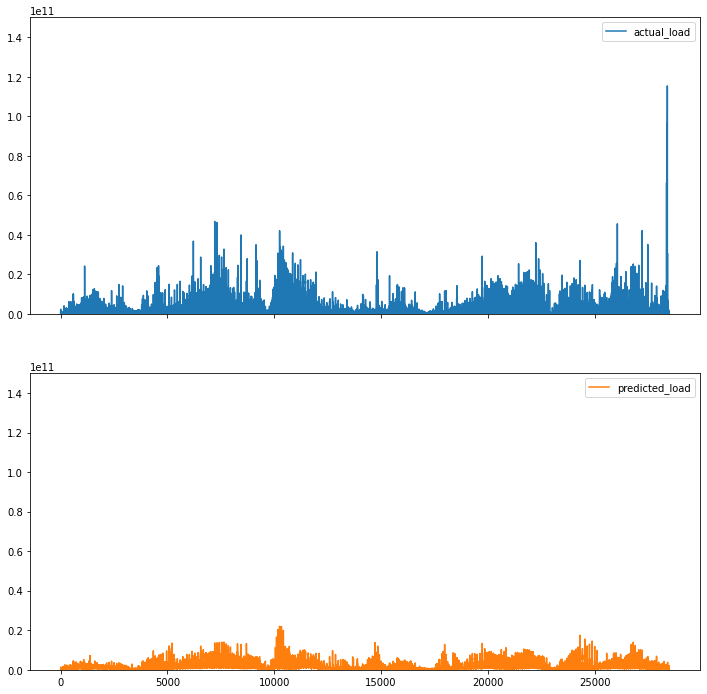

In [10]:
axes = fli_df.drop(columns=drop_columns).plot(subplots = True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 1.5e11)

### Distribution of high values (> HIGH_THRESHOLD)

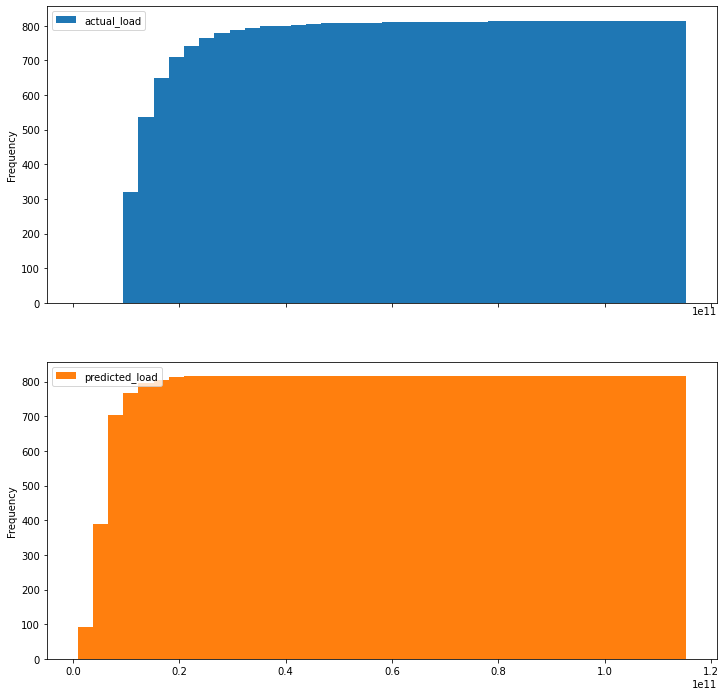

In [11]:
fli_df_high = fli_df[fli_df['actual_load'] >= HIGH_THRESHOLD].reset_index(drop=True)
axes = fli_df_high.drop(columns=drop_columns).plot.hist(bins=40, 
                                                        subplots=True, 
                                                        figsize=(12, 12),
                                                        cumulative=True)

### Error Stats

In [12]:
fli_err = fli_df.drop(columns=['lat', 'lon', 'predicted_load', 'actual_load'])

In [13]:
fli_err.max()

APE    2.240444e+07
dtype: float64

In [14]:
fli_err.mean()

APE    1206.710232
dtype: float64

In [15]:
fli_err.median()

APE    86.18986
dtype: float64